Unsupervised Machine Learning: Flat Clustering
K-Means clusternig example with Python and Scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

The KMeans import from sklearn.cluster is in reference to the K-Means clustering algorithm. The general idea of clustering is to cluster data points together using various methods. You can probably guess that K-Means uses something to do with means. What ends up happening is a centroid, or prototype point, is identified, and data points are "clustered" into their groups by the centroid they are the closest to.


Clusters being Called Cells, or Voronoi Cells, and references to Lloyd's Algorithm

One of the things that makes any new topic confusing is a lot of complex sounding terms. I do my best to keep things simple, but not everyone is as kind as me.


Some people will refer to the style of clusters that you wind up seeing as "Voronoi" cells. Usually the "clusters" have defining "edges" to them that, when shaded or colored in, look like geometrical polygons, or cells, like this:

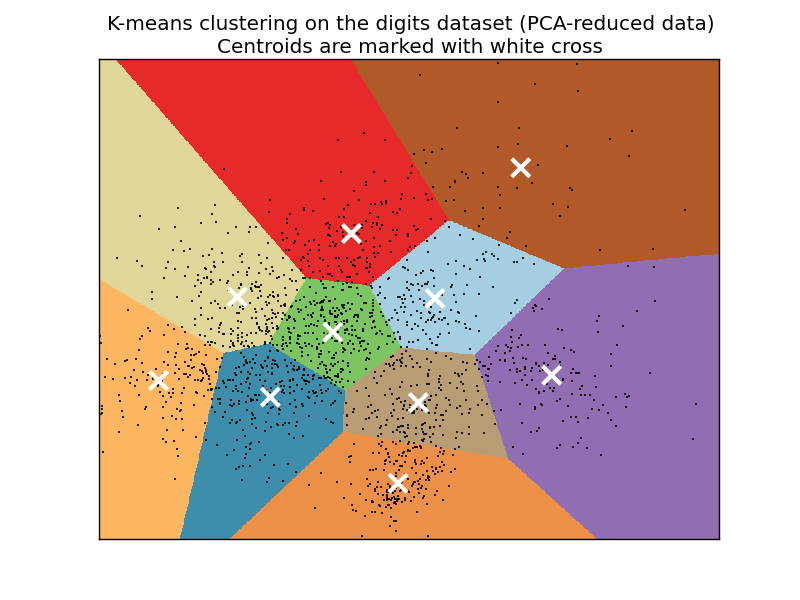

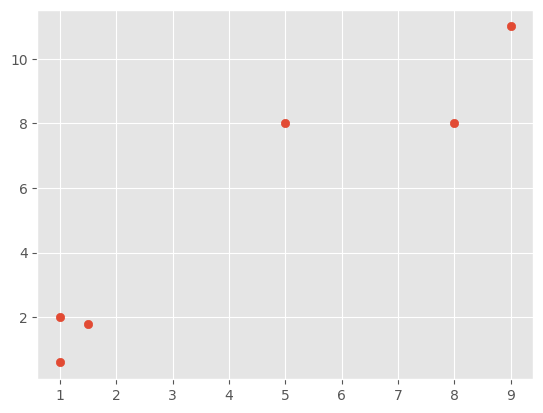

In [2]:
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]

plt.scatter(x,y)
plt.show()


This is the same set of data and graph that we used for our Support Vector Machine / Linear SVC example with supervised machine learning.

You can probably look at this graph, and group this data all on your own. Imagine if this graph was 3D. It would be a little harder. Now imagine this graph is 50-dimensional. Suddenly you're immobilized!

In the supervised machine learning example with this data, we were allowed to feed this data to the machine along with labels. Thus, the lower left group had labeling, and the upper right grouping did too. Our task there was to then accept future points and properly group them according the groups. Easy enough.

Our task here, however, is a bit different. We do not have labeled data, and we want the machine to figure out all on its own that it needs to group the data.

For now, since we're doing flat-clustering, our task is a bit easier since we can tell the machine that we want it categorized into two groups. Still, however, how might you do this?

K-Means approaches the problem by finding similar means, repeatedly trying to find centroids that match with the least variance in groups

This repeatedly trying ends up leaving this algorithm with fairly poor performance, though performance is an issue with all machine learning algorithms. This is why it is usually suggested that you use a highly stream-lined and efficient algorithm that is already tested heavily rather than creating your own.

You also have to decide, as the scientist, how highly you value precision as compared to speed. There is always a balance between precision and speed/performance. More on this later, however. Moving on with the code



In [3]:
X = np.array([[1, 2],
              [5, 8],
              [1.5, 1.8],
              [8, 8],
              [1, 0.6],
              [9, 11]])


Here, we're simply converting our data to a NumPy array. See the video if you're confused. You should see each of the brackets here are the same x,y coordinates as before. We're doing this because a NumPy array of features is what Scikit-learn / sklearn expects.

In [4]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)


[[7.33333333 9.        ]
 [1.16666667 1.46666667]]
[1 0 1 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Here, we initialize kmeans to be the KMeans algorithm (flat clustering), with the required parameter of how many clusters (n_clusters).

Next, we use .fit() to fit the data (learning)

Next, we're grabbing the values found for the Centroids, based on the fitment, as well as the labels for each centroid.

Note here that the "labels" here are labels that the machine has assigned on its own, same with the centroids.

Now we're going to actually plot and visualize the machine's findings based on our data, and the fitment according to the number of clusters we said to find.

coordinate: [1. 2.] label: 1
coordinate: [5. 8.] label: 0
coordinate: [1.5 1.8] label: 1
coordinate: [8. 8.] label: 0
coordinate: [1.  0.6] label: 1
coordinate: [ 9. 11.] label: 0


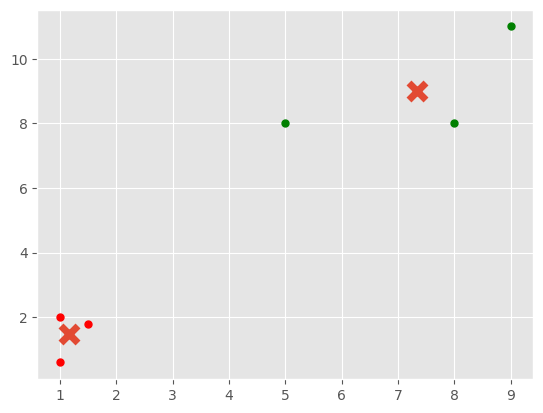

In [5]:
colors = ["g.","r.","c.","y."]

for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

The above code is all "visualization" code, having nothing more to do with Machine Learning than just showing us some results.

First, we have a "colors" list. This list will be used to be iterated through to get some custom colors for the resulting graph. Just a nice box of colors to use.


We only need two colors at first, but soon we're going to ask the machine to classify into other numbers of groups just for learning purposes, so I decided to put four choices here. The period after the letters is just the type of "plot marker" to use.

Now, we're using a for loop to iterate through our plots.

If you're confused about the for loop, you may need to first run through the Python 3 Basics series, or specifically the For Loop basics tutorial.

If you're confused about the actual code being used, especially with iterating through this loop, or the scatter plotting code slices that look like this: [:, 0], then check out the video. I explain them there.

The resulting graph, after the one that just shows the points, should look like:

Do you see the Voronoi cells? I hope not, we didn't draw them. Remember, those are the polygons that mark the divisions between clusters. Here, we have each plot marked, by color, what group it belongs to. We have also marked the centroids as big blue "x" shapes.

As we can see, the machine was very successful! Now, I encourage you to play with the n_clusters variable. First, decide how many clusters you will do, then try to predict where the centroids will be.

Unsupervised Machine Learning: Hierarchical Clustering
Mean Shift cluster analysis example with Python and Scikit-learn

The next step after Flat Clustering is Hierarchical Clustering, which is where we allow the machine to determined the most applicable unumber of clusters according to the provided data.


It is posited that humans are the only species capable of hierarchical thinking to any large degree, and it is only the mammalian brain that exhibits it at all, since some chimps have been able to learn things like sign language.


What actually is hierarchical thinking?


Hierarchical thinking is shown when you can take a structure with many elements, arrange those elements into a pattern, give that pattern a symbol, and then use that symbol as an element in another structure with many elements, repeating this process many times for many layers of "complexity."


One of the easiest examples of hierarchical thinking is written language. First you have lines, then you take those lines and put them together to make shapes, called letters. Next you arrange those letters into patterns and call them words with unique names and meanings for each word. Then we take these words to form patterns of meaning called sentences. Then we put those together to express entire ideas, concepts, and general knowledge.



With this, humans the only species on this planet capable of actually "compounding" their knowledge, building on top of pre-existing knowledge, continually adding layers of complexity, yet easily understanding it because we've employed hierarchical thinking.



In [7]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

NumPy for the swift number crunching, then, from the clustering algorithms of scikit-learn, we import MeanShift.

We're going to be using the sample generator built into sklearn to create a dataset for us here, called make_blobs.

Finally, Matplotlib for the graphing aspects.

In [8]:
centers = [[1,1],[5,5],[3,10]]
X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1)

Above, we're making our example data set. We've decided to make a dataset that originates from three center-points. One at 1,1, another at 5,5 and the other at 3,10. From here, we generate the sample, unpacking to X and y. X is the dataset, and y is the label of each data point according to the sample generation.


This part might confuse some people. We're unpacking to y because we have to, since the make_blobs returns a label, but we do not actually use y, other than to possibly test the accuracy of the algorithm. Remember, unsupervised learning does not actually train against data and labels, it derives structure and labels on its own, it's not derivative.



What we have now is an example data set, with 500 randomized samples around the center points with a standard deviation of 1 for now.


This has nothing to do with machine learning yet, we're just creating a data set. At this point, it would help to visualize the data set, so let's do:

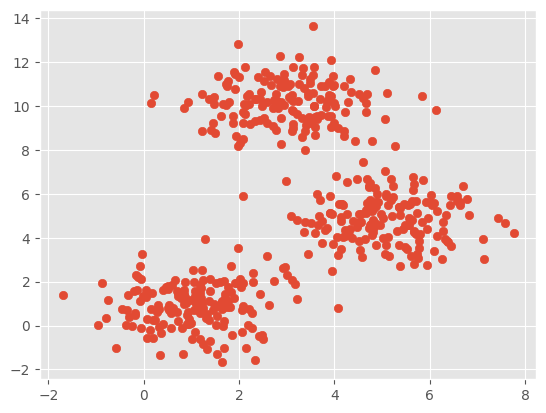

In [9]:
plt.scatter(X[:,0],X[:,1])
plt.show()


Your example should look similar. Here, we can already identify ourselves the major clusters. There are some points in between the clusters that we might not know exactly where they go, but we can see the clusters.

What we want is the machine to do the same thing. We want the machine to see this data set, without knowing how many clusters there ought to be, and identify the same three clusters we can see are obviously clusters.

For this, we're going to use MeanShift

In [10]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_


First we initialize MeanShift, then we fit according to the dataset, "X."

Next we populate labels and cluster_centers with the machine-chosen labels and cluster centers. Keep in mind here, the labels are the ones the machine has chosen, these are not the same labels as the unpacked-to "y" variable above.



We could compare the two for an accuracy measurement, but this may or may not be very useful in the end, given the way we're synthetically generating data. If we were to set our standard deviation to, say, 10, there would be signficant overlap. Even if the data originally came from from one cluster, it might actually be a better fit into another. This isn't really a fault of the machine learning algorithm in any way. The data is actually a better fit elsewhere and you were too wild with the standard deviation in the generation.


Instead, it might be a bit better of an accuracy measurement to compare the cluster_centers with the actual cluster centers you started with (centers = [[1,1],[5,5],[3,10]]) to create the random data. We'll see how accurate this is, though it should be a given that: The more samples you have, and the less standard deviation, the more accurate your predicted cluster centers should be compared to the actual ones used to generate the randomized data. If this is not the case, then the machine learning algorithm might be problematic.


We can see the cluster centers and grab the total number of clusters by doing the followin

In [11]:
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

[[ 5.09713463  4.84463029]
 [ 1.06290062  0.913825  ]
 [ 3.00629308 10.15081116]]
Number of estimated clusters: 3


Next, since we're intending to graph the results, we want to have a nice list of colors to choose from:

In [12]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.']

This is just a simple list of red, green, blue, cyan, black, yellow, and magenta multiplied by ten. We should be confident that we're only going to need three colors, but, with hierarchical clustering, we are allowing the machine to choose, we'd like to have plenty of options. This allows for 70 clusters, so that should be good enough.

Now for the plotting code. This code is purely for graphing only, and has nothing to do with machine learning other than helping us petty humans to see what is happening:

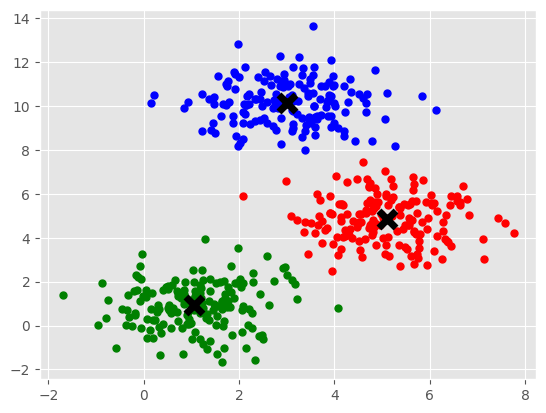

In [13]:
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

Above, first we're iterating through all of the sample data points, plotting their coordinates, and coloring by their label # as an index value in our color list.

After the for loop, we are calling plt.scatter to scatter plot the cluster centers.


Finally, we show it. You should see something similar to:

Your centers will be slightly different, and the centers will be different every time you run it, since there is a degree of randomness with our sample generation. Regardless, the cluster_centers are darn close to the original values that we created. Very impressive.

From here, try adding more clusters, try increasing the standard deviation. Without getting too absurd, try to give the machine a decent challenge.

Now, let's do a bonus round! How about 3 dimensions? If you want to learn more about 3D plotting, see the 3D plotting with Matplotlib Tutorial.

[[3.58972322 7.80541872 8.01981302]
 [0.98740908 0.86569659 1.23148211]]
Number of estimated clusters: 2
['r', 'g', 'b', 'c', 'k', 'y', 'm', 'r', 'g', 'b', 'c', 'k', 'y', 'm', 'r', 'g', 'b', 'c', 'k', 'y', 'm', 'r', 'g', 'b', 'c', 'k', 'y', 'm', 'r', 'g', 'b', 'c', 'k', 'y', 'm', 'r', 'g', 'b', 'c', 'k', 'y', 'm', 'r', 'g', 'b', 'c', 'k', 'y', 'm', 'r', 'g', 'b', 'c', 'k', 'y', 'm', 'r', 'g', 'b', 'c', 'k', 'y', 'm', 'r', 'g', 'b', 'c', 'k', 'y', 'm']
[0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0
 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1
 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 1 1 

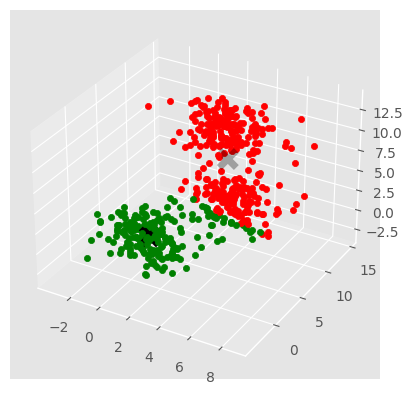

In [15]:
import numpy as np
from sklearn.cluster import MeanShift# as ms
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1.5)



ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']

print(colors)
print(labels)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):

    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')


ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()